In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
import yfinance as yf
import seaborn as sns
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings("ignore")

Import IHSG Data

In [2]:
start_date = "2020-01-01"
end_date = "2025-10-30"

df = yf.Ticker("^JKSE")
df = df.history(start=start_date, end=end_date)
del df['Dividends']
del df['Stock Splits']
forecastData = df.copy()
df.tail(20)

,Open,High,Low,Close,Volume
Date,,,,,
2025-10-02 00:00:00+07:00,8070.424805,8109.436035,8059.048828,8071.081055,402266500
2025-10-03 00:00:00+07:00,8099.645020,8118.300781,8076.597168,8118.300781,428024700
2025-10-06 00:00:00+07:00,8155.365234,8176.308105,8104.551758,8139.894043,429540400
2025-10-07 00:00:00+07:00,8182.655762,8217.045898,8153.712891,8169.280762,426851900
2025-10-08 00:00:00+07:00,8201.140625,8224.644531,8044.933105,8166.028809,355267800
2025-10-09 00:00:00+07:00,8187.700195,8272.631836,8159.944824,8250.938477,347199100
2025-10-10 00:00:00+07:00,8259.075195,8270.332031,8194.046875,8257.859375,366345900
2025-10-13 00:00:00+07:00,8169.648926,8288.279297,8133.626953,8227.202148,366939200
2025-10-14 00:00:00+07:00,8269.480469,8284.910156,7974.029785,8066.521973,440487100


In [3]:
df.describe()

,Open,High,Low,Close,Volume
count,1405.000000,1405.000000,1405.000000,1405.000000,1.405000e+03
mean,6618.338355,6654.991948,6574.719876,6614.450966,1.725681e+08
std,801.296888,798.801529,802.445882,799.836547,7.513803e+07
min,3937.632080,4123.562012,3911.716064,3937.632080,0.000000e+00
25%,6144.942871,6166.628906,6102.795898,6139.651855,1.317462e+08
50%,6827.033203,6859.706055,6793.764160,6823.334961,1.652387e+08
75%,7133.453125,7174.283203,7086.275879,7129.276855,2.070395e+08
max,8322.216797,8354.672852,8271.721680,8274.351562,6.150719e+08


Close & Open IHSG Visualitation History

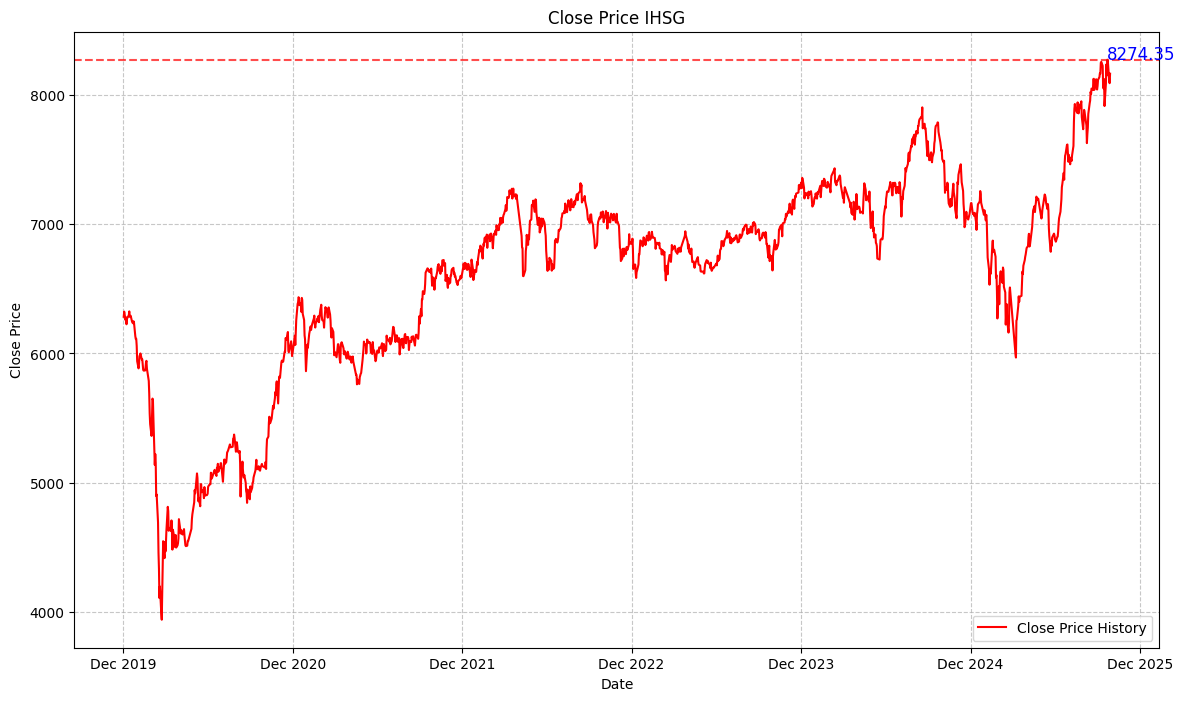

In [4]:
# Close price visualitation

plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x=df.index, y='Close', label='Close Price History', color='red')

max_price = df['Close'].max()
max_price_date = df['Close'].idxmax()

# Annotate the hight price
plt.annotate(f'{max_price:.2f}',
             xy=(max_price_date, max_price),
             xytext=(max_price_date, max_price + 2),
             fontsize=12, color='blue')

plt.axhline(max_price, linestyle='--', color='red', alpha=0.7)
plt.title('Close Price IHSG')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

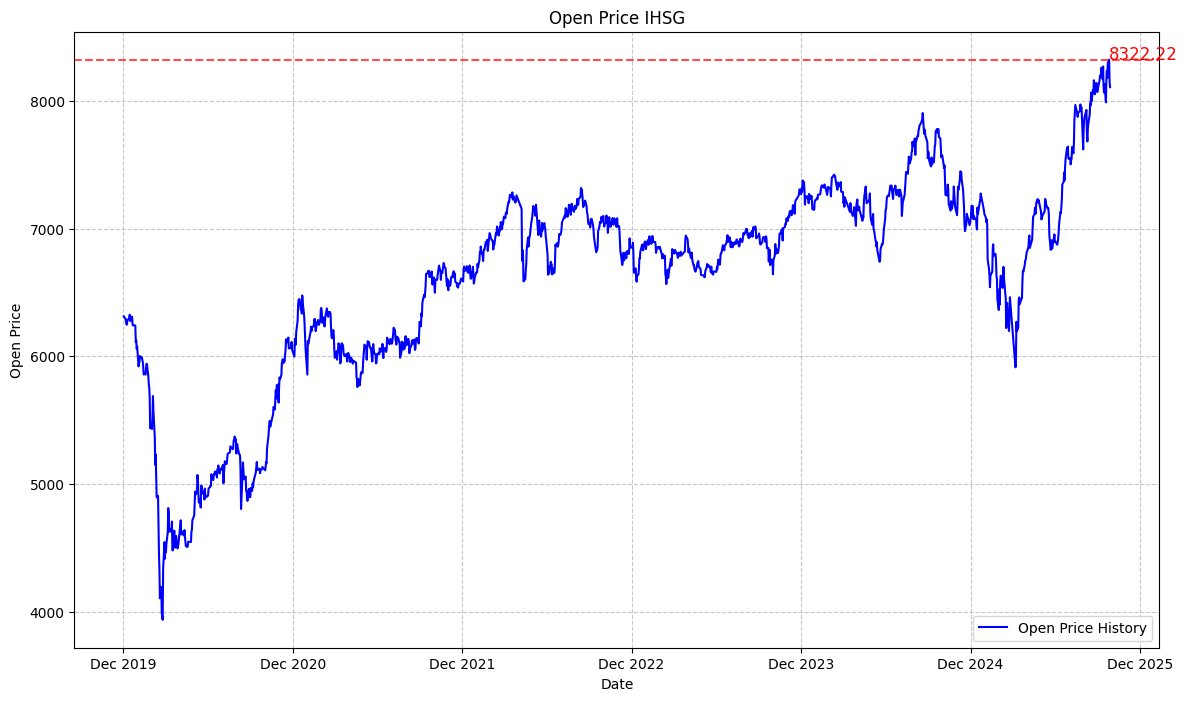

In [5]:
# Open price visualitation

plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x=df.index, y='Open', label='Open Price History', color='blue')

max_price = df['Open'].max()
max_price_date = df['Open'].idxmax()

# Annotate the hight price
plt.annotate(f'{max_price:.2f}',
             xy=(max_price_date, max_price),
             xytext=(max_price_date, max_price + 2),
             fontsize=12, color='red')

plt.axhline(max_price, linestyle='--', color='red', alpha=0.7)
plt.title('Open Price IHSG')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
scaled_data

array([[0.54095013],
       [0.55014712],
       [0.53491372],
       ...,
       [0.96375124],
       [0.95809675],
       [0.975067  ]])

In [7]:
def create_sequences(df, sequence_length):
    sequences = []
    labels = []
    for i in range(len(df) - sequence_length):
        sequences.append(df[i:i + sequence_length])
        labels.append(df[i + sequence_length, 0])
    return np.array(sequences), np.array(labels)

In [8]:
sequence_length = 30

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

Data Modelling

In [9]:
# Define X and y

#X = df.drop(['Close'], axis=1)
#y = df['Close']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression

# Reshape data for LinearRegression (transform from 3D into 2D)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Initialitation and training model
model = LinearRegression(n_jobs=-1, positive=True)
model.fit(X_train_reshaped, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,True


In [11]:
# Make preidctions
predictions = model.predict(X_test_reshaped)
predictions = predictions.reshape(-1, 1)

# Transform back predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics using original scale date
mse = mean_squared_error(y_test_scaled, predictions)
rmse = root_mean_squared_error(y_test_scaled, predictions)
r2 = r2_score(y_test_scaled, predictions)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")

Mean Squared Error: 7301.03
Root Mean Squared Error: 85.45
R2 Score: 0.9741


In [12]:
# Get last 30 days of data and prepare for prediction
last_30_days = df['Close'][-sequence_length:].values.reshape(-1, 1)
last_30_days_scaled = scaler.transform(last_30_days)

# Reshape data properly for prediction
X_predict = last_30_days_scaled.reshape(1, sequence_length)  # Reshape to 2D array

# Make prediction
predicted_price = model.predict(X_predict)

# Inverse transform the prediction
predicted_price = predicted_price.reshape(-1, 1)
predicted_price = scaler.inverse_transform(predicted_price)

print(f"Predicted IHSG Price: {predicted_price[0][0]:.2f}")

Predicted IHSG Price: 8162.64


In [13]:
future_days = 30

# Get and scale last 30 days data
last_30_days = df['Close'][-sequence_length:].values.reshape(-1, 1)
last_30_days_scaled = scaler.transform(last_30_days)
future_predictions = []

# initial reshape for first prediction
current_sequence = last_30_days_scaled.reshape(1, -1)

for _ in range(future_days):
    predicted_price = model.predict(current_sequence)

    # Inverse transform and store prediction
    predicted_price = predicted_price.reshape(-1, 1)
    predicted_price_unscaled = scaler.inverse_transform(predicted_price)
    future_predictions.append(predicted_price_unscaled[0, 0])

    # update sequence for next prediction
    current_sequence = np.roll(current_sequence, -1)
    current_sequence[0, -1] = predicted_price[0, 0]

# create future dates
future_dates = pd.date_range(start=df.index[-1], periods=future_days+1, freq='D')[1:]

future_predictions_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted Price IHSG': future_predictions})

Data Visualitation for IHSG Predicts

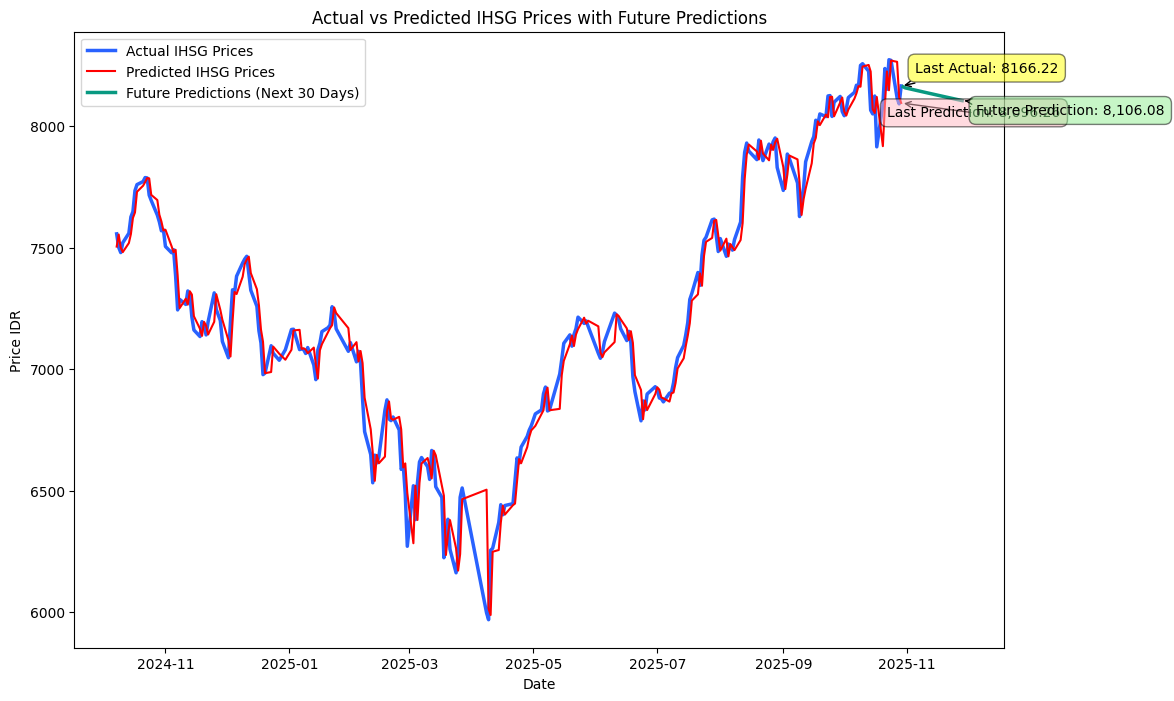

In [14]:
plt.figure(figsize=(12, 8))

plt.plot(df.index[-len(y_test_scaled):], y_test_scaled, label='Actual IHSG Prices', color='#2962ff', linewidth=2.5)
plt.plot(df.index[-len(y_test_scaled):], predictions, label='Predicted IHSG Prices', color='red', linewidth=1.5)
plt.plot(future_dates, future_predictions, label='Future Predictions (Next 30 Days)', color='#089981', linewidth=2.5)

# Annotate for last actual IHSG
last_actual = y_test_scaled[-1][0]
plt.annotate(f'Last Actual: {last_actual:.2f}',
             xy=(df.index[-len(y_test_scaled):][-1], last_actual),
             xytext=(10, 10), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Annotate for last predict IHSG
last_predicion = predictions[-1][0]
plt.annotate(f'Last Prediction: {last_predicion:,.2f}',
             xy=(df.index[-len(y_test_scaled):][-1], last_predicion),
             xytext=(-10, -10), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='lightpink', alpha=0.5),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Annotation for last predict in the future
last_future = future_predictions[-1]
plt.annotate(f'Future Prediction: {last_future:,.2f}',
             xy=(future_dates[-1], last_future),
             xytext=(10, -10), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='lightgreen', alpha=0.5),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.title('Actual vs Predicted IHSG Prices with Future Predictions')
plt.xlabel('Date')
plt.ylabel('Price IDR')
plt.legend()
plt.show()

In [15]:
future_predictions_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Price_IHSG': future_predictions
})

future_predictions_df.tail()

,Date,Predicted_Price_IHSG
25,2025-11-24 00:00:00+07:00,8113.402408
26,2025-11-25 00:00:00+07:00,8111.565688
27,2025-11-26 00:00:00+07:00,8109.732636
28,2025-11-27 00:00:00+07:00,8107.903247
29,2025-11-28 00:00:00+07:00,8106.077511


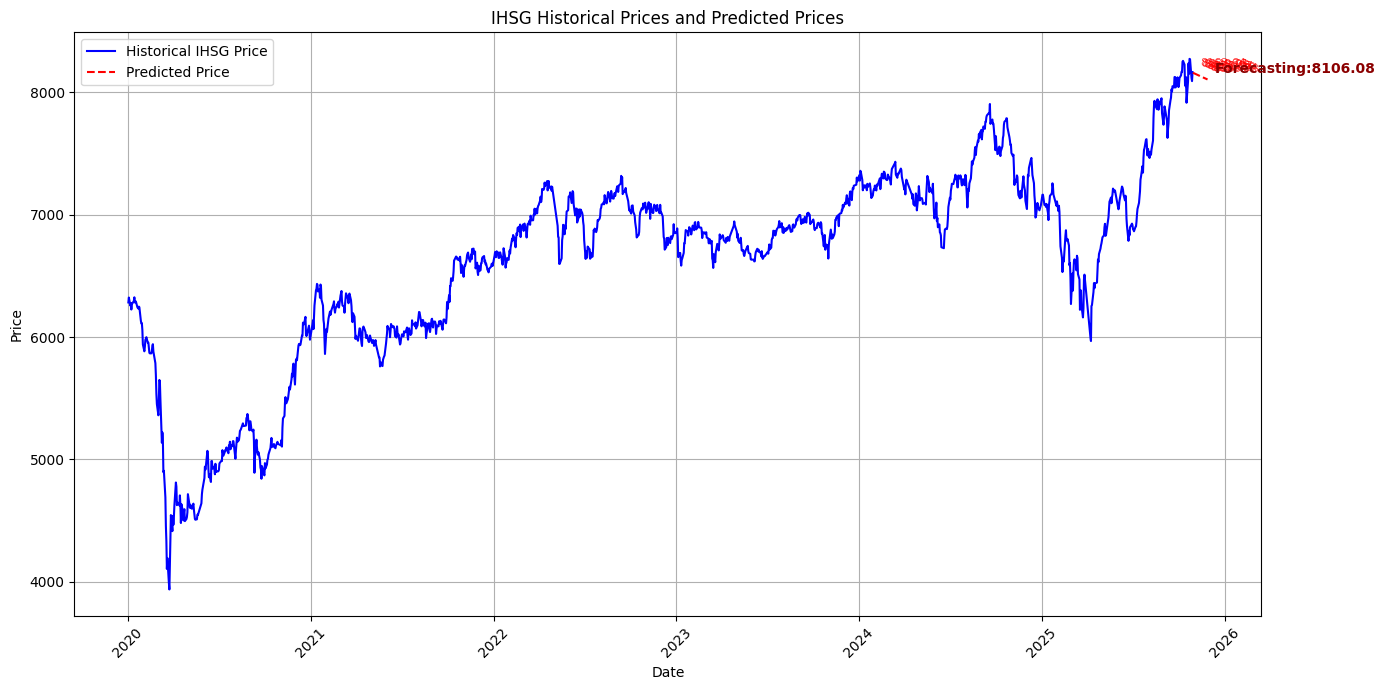

In [33]:
# Visualitation result

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Historical IHSG Price', color='blue')
plt.plot(future_predictions_df['Date'], future_predictions_df['Predicted_Price_IHSG'],
         label='Predicted Price', color='red', linestyle='--')
plt.title('IHSG Historical Prices and Predicted Prices')

# add annotations for everyh 5th predicted value to avoid overcrowding
step_size = max(1, len(future_predictions_df) // 10)
for i in range(0, len(future_predictions_df), step_size):
    date = future_predictions_df['Date'].iloc[i]
    price = future_predictions_df['Predicted_Price_IHSG'].iloc[i]
    plt.annotate(f'{price:.2f}',
                 xy=(date, price),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=8,
                 color='red',
                 alpha=0.7)
    
# add annotation for the last predicted value
last_date = future_predictions_df['Date'].iloc[-1]
last_price = future_predictions_df['Predicted_Price_IHSG'].iloc[-1]
plt.annotate(f'Forecasting:{last_price:.2f}',
              xy=(last_date, last_price),
              xytext=(5, 5),
              textcoords='offset points',
              fontsize=10,
              color='darkred',
              weight='bold')

plt.title('IHSG Historical Prices and Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# calculate percentage change from the last actual close price
last_actual_price = df['Close'].iloc[-1]
percentage_change = ((future_predictions_df['Predicted_Price_IHSG'].iloc[-1] - last_actual_price) / last_actual_price) * 100

# Determine profit or loss
status = "profit" if percentage_change > 0 else "loss"

# print the percentage prediction
print(f"Percentage prediction for 30 days is: {status} {abs(percentage_change):.2f}%")

Percentage prediction for 30 days is: loss 0.74%
